# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']


In [36]:
from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline
from sklearn.linear_model import LogisticRegression

### Now take a look at the shapes of the X and y matricies 

In [5]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [14]:
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

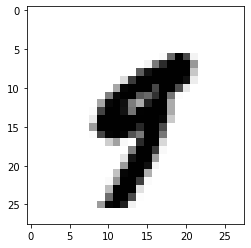

In [20]:
num = X[36000].reshape(28,28)
plt.imshow(num, cmap=plt.cm.binary); 

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [22]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [45]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [46]:
y_train_five = np.where(y_train == '5', 1, 0)
y_test_five = np.where(y_test == '5', 1, 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [47]:
number_five_model = LogisticRegression().fit(X_train, y_train_five)

### Does the classifier predict correctly the 36000th digit we picked before?

In [50]:
test_predict = number_five_model.predict(X_train)
test_predict_test = number_five_model.predict(X_test)

test_predict[36000]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [55]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [66]:
never_5_clf.fit(X_train)
never_five_test = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [68]:
from sklearn.metrics import confusion_matrix
confu_first = confusion_matrix(y_test_five, test_predict_test)
confu_classifier = confusion_matrix(y_test_five, never_five_test)

print(confu_first)
print(confu_classifier)

#Accurancy = (9034+745)/(9034+74+147+745) = 0.9779

[[9034   74]
 [ 147  745]]
[[9108    0]
 [ 892    0]]


In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_five, test_predict_test)
recall = recall_score(y_test_five, test_predict_test)
f1 = f1_score(y_test_five, test_predict_test)

precision_2 = precision_score(y_test_five, never_five_test)
recall_2 = recall_score(y_test_five, never_five_test)
f1_2 = f1_score(y_test_five, never_five_test)

print(precision, precision_2)
print("*"*79)
print(recall, recall_2)
print("*"*79)
print(f1, f1_2)

0.9096459096459096 0.0
*******************************************************************************
0.8352017937219731 0.0
*******************************************************************************
0.8708357685563999 0.0


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

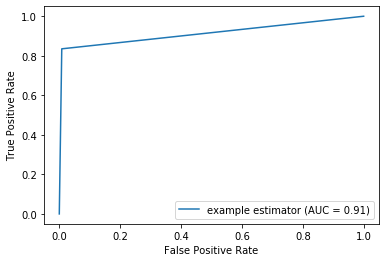

In [71]:
from sklearn import metrics
#metrics.roc_curve(y_test_five, test_predict_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test_five, test_predict_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc Curve - Normal')
display.plot()  # doctest: +SKIP
plt.show()

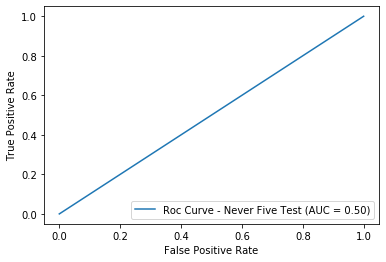

In [72]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_five, never_five_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc Curve - Never Five Test')
display.plot()  # doctest: +SKIP
plt.show()

### Now find the roc_auc_score for each. 

In [70]:
from sklearn.metrics import roc_auc_score
roc_normal= roc_auc_score(y_test_five, test_predict_test)
roc_classifier = roc_auc_score(y_test_five, never_five_test)

print(roc_normal)
print("_"*79)
print(roc_classifier)

0.9135385341029717
_______________________________________________________________________________
0.5


### What does this metric tell you? Which classifier works better with this metric in mind?